In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(X[['Geography']])

In [6]:
ohetransform

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [7]:
Gender = pd.get_dummies(X['Gender'], drop_first=True, dtype=int)

In [8]:
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [9]:
X = pd.concat([X, ohetransform, Gender], axis=1)

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0


In [11]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
X_train.shape

(8000, 12)

In [15]:
import tensorflow

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ReLU
from keras.layers import Dropout

In [17]:
classifier = Sequential()

In [18]:
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu", input_dim=12))

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))

In [20]:
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [21]:
classifier.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=['accuracy'])

In [22]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3704 - loss: 0.9246 - val_accuracy: 0.6384 - val_loss: 0.6344
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6890 - loss: 0.6148 - val_accuracy: 0.7883 - val_loss: 0.5363
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7940 - loss: 0.5340 - val_accuracy: 0.8012 - val_loss: 0.4896
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7979 - loss: 0.4908 - val_accuracy: 0.8050 - val_loss: 0.4614
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8021 - loss: 0.4641 - val_accuracy: 0.8076 - val_loss: 0.4437
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8002 - loss: 0.4565 - val_accuracy: 0.8145 - val_loss: 0.4316
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8149 - loss: 0.4289 - val_accuracy: 0.8190 - val_loss: 0.4229
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8204 - loss: 0.4219 - val_accu

In [43]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


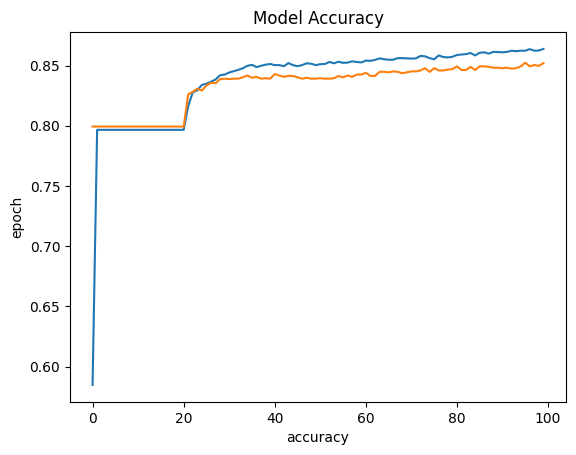

In [44]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.show()

In [45]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[1517,   66],
       [ 229,  188]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred_test)
score

0.8525